# Introduction to Regression with Neural Networks


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

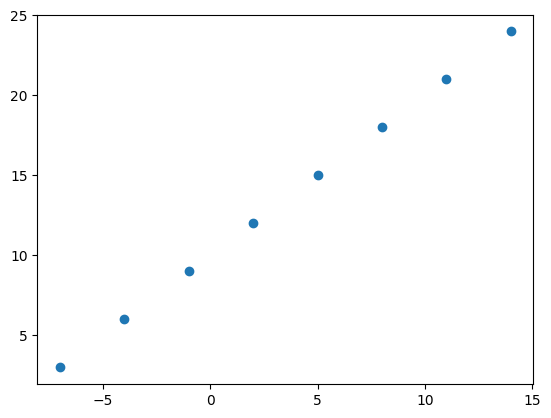

In [2]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1],y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
#Turn our Numpy Arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

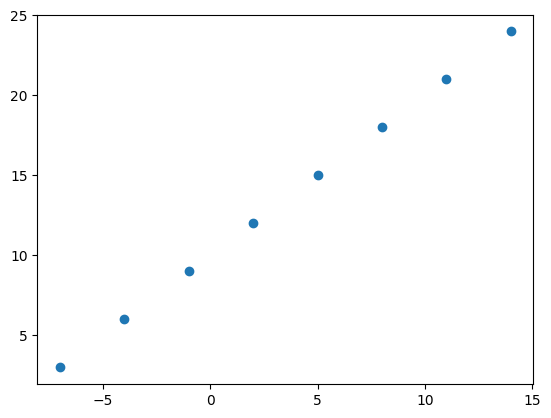

In [11]:
plt.scatter(X,y)

#Steps in modelling TensorFlow

1. Creating a model - define the input and output layers as well as the hidden layers of a deep learning model
2. Compiling a model define the loss function and the optimizer and evaluation metrics
3. Fitting a model - letting the model try to find patterns between X & y


1.   Loss = How wrong your models predictions compared to the truth label
2.   Optimizer = How your model should update its internal paterns to better its predictions
3.   Metrics = Human interpretable values for how well your model is doing




In [12]:
tf.random.set_seed(42)
# Create the model using Sequential API
model = tf.keras.Sequential([ #sequential katmanlari sirayla(ardisik) eklemek icin kullanilan model tipi
    tf.keras.layers.Dense(1) #icinde 1 adet nöron var yani bu model giristeki veriyi alip tek bir cikti degeri uretir
])

#2. Compile the modle
model.compile(loss = tf.keras.losses.mae, # hata fonksiyonu mae
              optimizer = tf.keras.optimizers.SGD(),# sgd is short for stochastics gradient descent = agirliklari adim adim guncelleyerek kaybi azaltmaya calisir (ogrenme algoritmasi sgd)
              metrics=["mae"]) #egitim sirasinda takip etmek istedigimiz metrik
#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) #epochs = 5 tüm veri setini 5 kez bastan sona modelin gormesini sagliyoruz
#Burada axis=-1, sonuna yeni bir boyut ekliyor.

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step - loss: 15.3016 - mae: 15.3016
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 15.0203 - mae: 15.0203
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.8185 - mae: 14.8185
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 14.6860 - mae: 14.6860
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 14.5535 - mae: 14.5535


X = [1, 2, 3, 4]
X.shape → (4,)

tf.expand_dims(X, axis=-1).shape → (4, 1)
bu yuzden fitte tf.expand_dims kullaniyoruz

In [13]:
# Try and make prediction using our model
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [14]:
#Improving our model (options are adding more layers(number of tf.keras.layers.dense) change the activation function , increase the number of hidden units,change the optimization function,change the learning rate, fitting on more data , fitting for longer(epochs))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step - loss: 16.5987 - mae: 16.5987
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 16.3174 - mae: 16.3174
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 16.0362 - mae: 16.0362
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 15.7549 - mae: 15.7549
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 15.4737 - mae: 15.4737
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 15.1924 - mae: 15.1924
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 14.9183 - mae: 14.9183
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 14.7858 - mae: 14.7858
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 14.6533 - mae: 14.6533
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.5208 - mae: 14.5208
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 14.3883 - mae: 14.3883
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.2558 - mae: 14.2558
Epoch 13/100
1/1 ━

In [15]:
model.predict(tf.expand_dims([17.0],axis=-1)) #much more better

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[29.492556]], dtype=float32)

In [16]:
#This time with an extra hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step - loss: 12.6393 - mae: 12.6393
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.0066 - mae: 12.0066
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.3631 - mae: 11.3631
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.7029 - mae: 10.7029
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.0211 - mae: 10.0211
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 9.3129 - mae: 9.3129
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.5798 - mae: 8.5798
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.8155 - mae: 7.8155
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.0005 - mae: 7.0005
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.1306 - mae: 6.1306
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.1963 - mae: 5.1963
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4.2294 - mae: 4.2294
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[31.746939]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #changed to Adam also added learning rate
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step - loss: 12.5221 - mae: 12.5221
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.8084 - mae: 11.8084
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.0898 - mae: 11.0898
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.3641 - mae: 10.3641
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.6281 - mae: 9.6281
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.8783 - mae: 8.8783
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.1117 - mae: 8.1117
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.3255 - mae: 7.3255
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.8367 - mae: 6.8367
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.0247 - mae: 7.0247
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.3063 - mae: 7.3063
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.5246 - mae: 7.5246
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [19]:
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[25.698702]], dtype=float32)

## Evaluating a model

In [20]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
#Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

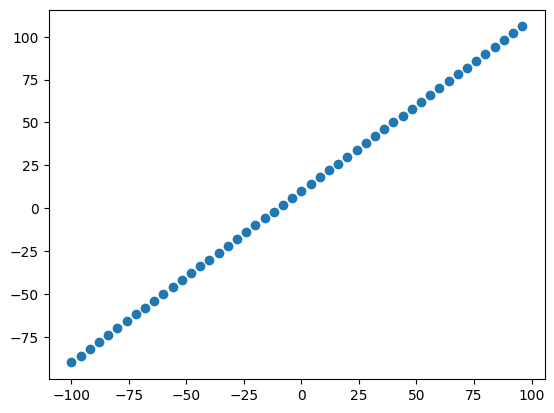

In [22]:
plt.scatter(X,y)

### The 3 sets

* **Training set** = the model learns from this data typically %70-80 of the total data
* **Validation set** - the model gets tuned on this data 10-15 % data
* **Test set** = the model gets evaluated typically 10-15 %

In [23]:
len(X)

50

In [24]:
#Split the data into train and test sets
X_train = X[:40] #first 40 training samples
y_train = y[:40]

X_test = X[40:] #last 10 testing samples
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

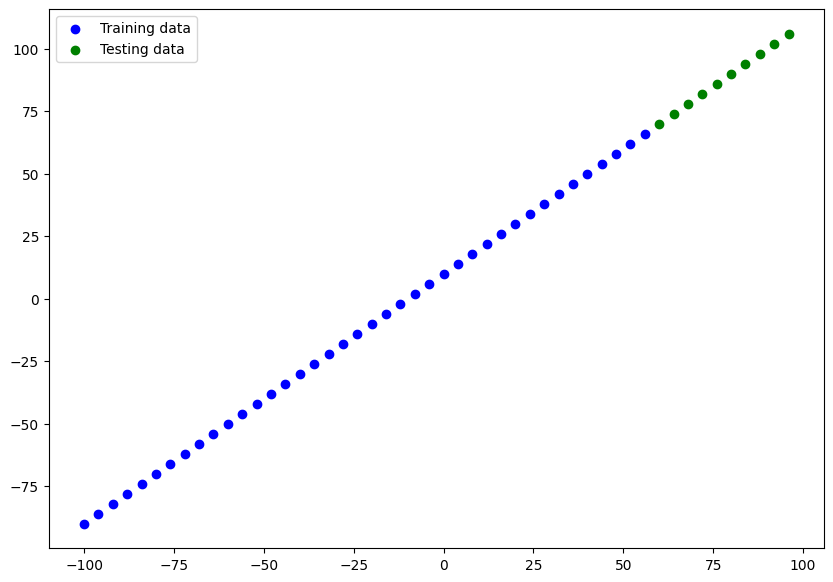

In [25]:
# Visualizing the data
plt.figure(figsize=(10,7)) #10 × 7 inç
#Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")

#Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")

#Show the legend
plt.legend();

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# model.fit(X_train,y_train,epochs=100)

In [27]:
print("X_train:", X_train.shape, X_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)

X_train: (40,) <dtype: 'int32'>
y_train: (40,) <dtype: 'int32'>


In [28]:
X[0].shape,X[0],y[0]

(TensorShape([]),
 <tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [29]:

X_train = tf.reshape(X_train, [-1, 1])  # (40,) -> (40, 1)
y_train = tf.reshape(y_train, [-1, 1])  # (40,) -> (40, 1)

# Veri tiplerini float'a çevirin
X_train = tf.cast(X_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

print(f"X_train yeni shape: {X_train.shape}")
print(f"y_train yeni shape: {y_train.shape}")

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_2")

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)


X_train yeni shape: (40, 1)
y_train yeni shape: (40, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Parms =  total number of paramteres in the model
* Trainable paramters =  these are the parameters the model can update as it trains
* NON-trainable params = this is typical when you bring in already learn patterns or paramteres from other models during transfer learning!!

# Dense Katmanları — Parametre Hesabı ve Kısa Örnekler

**Parametre sayısı (Dense katmanı için):**

```
params = units * (input_dim + 1)   # +1 bias için
```

---

## Örnek 1 — Çok katmanlı model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
    tf.keras.layers.Dense(1)
])
```

* İlk katman param = `100 * (1 + 1) = 200`
* İkinci katman param = `1 * (100 + 1) = 101`  (çünkü ikinci katmanın girdi boyutu 100)
* Toplam param = `301`

**model.summary() (örnek çıktı)**

```
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 100)               200
dense_1 (Dense)              (None, 1)                 101
=================================================================
Total params: 301
Trainable params: 301
Non-trainable params: 0
```

---

## Örnek 2 — Tek katmanlı model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1])
])
```

* Parametre sayısı = `5 * (1 + 1) = 10`

**model.summary() (örnek çıktı)**

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 5)                 10
=================================================================
Total params: 10
Trainable params: 10
Non-trainable params: 0
```

---

## Kısa notlar

* Aktivasyon fonksiyonları (`relu`, `sigmoid`, vb.) **parametre sayısını değiştirmez**; sadece katmanın çıktısını nasıl hesapladığını etkiler.
* Çok büyük `units` sayıları modelin kapasitesini artırır ama **overfitting** riskini ve hesaplama maliyetini yükseltir.
* Giriş verin tek boyutluysa modele verirken `(n,1)` şekline getirin: örn. `X.reshape(-1,1)` veya `tf.expand_dims(X, -1)`.

---

Kopyala-yapıştır yapabileceğin tek sayfa metin bu şekilde hazır. İstersen bu metni Colab'a yapıştırdığında çalıştırılabilir kod blokları halinde de düzenleyeyim.


In [31]:
model.fit(X_train,y_train,epochs=100,verbose= 0) #verbose eğitim sırasında ekrana ne kadar bilgi yazdırılacağını kontrol eden parametre.
# 0 = hic bilgi yazdirmaz  2 sade satir bilgisi yazdirir bi tane

In [32]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

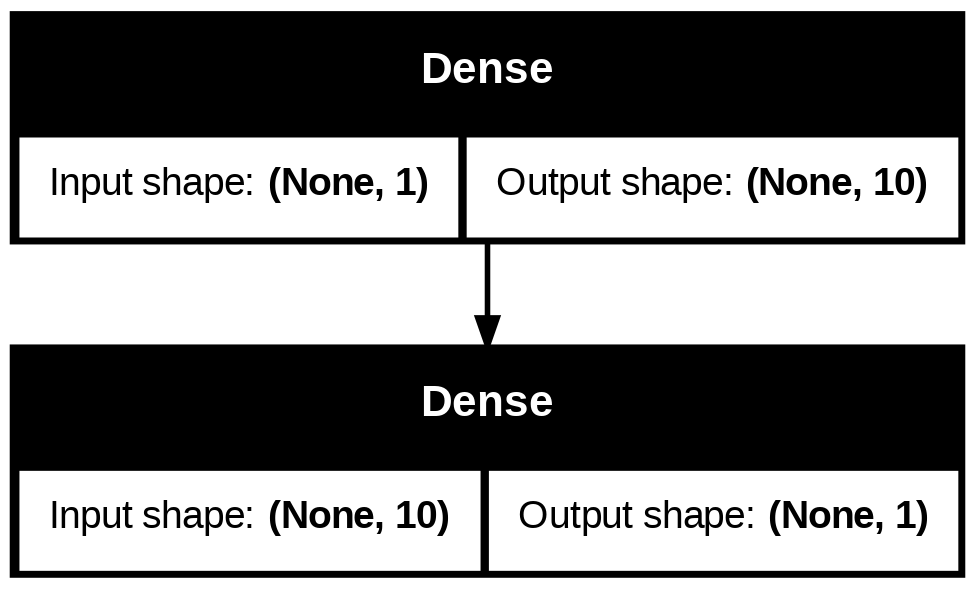

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes=True)

In [34]:
#Visualize the models predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[ 71.77273 ],
       [ 75.89582 ],
       [ 80.01891 ],
       [ 84.142006],
       [ 88.26509 ],
       [ 92.38819 ],
       [ 96.511284],
       [100.63438 ],
       [104.75746 ],
       [108.880554]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")

  #Plot test data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")

  #plot models predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")

  #Show the legend
  plt.legend();

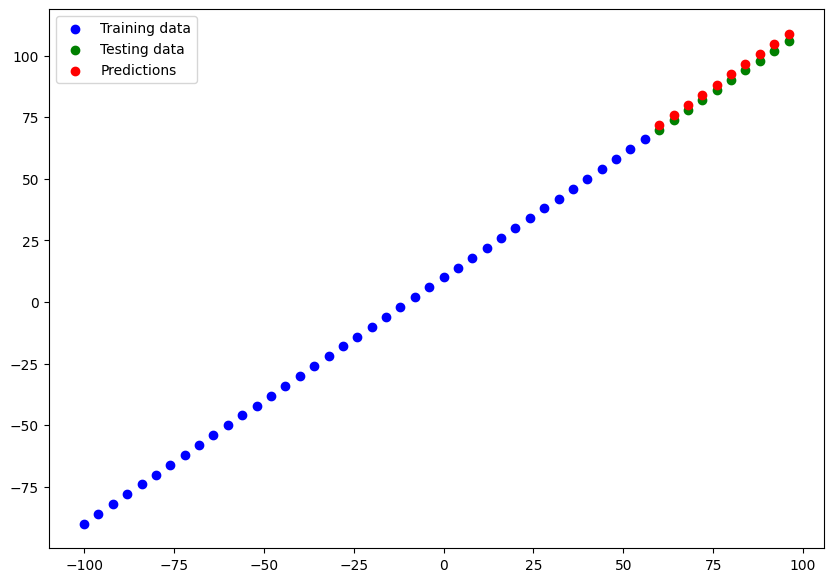

In [37]:
plot_predictions()

### Evaluating our models predictions with regression evaluation metrics

In [38]:
# two main metrics MAE - mean absolute error and MSE - mean square error HUBER = combination of MSE AND MAE
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 2.3266 - mae: 2.3266


[2.3266425132751465, 2.3266425132751465]

In [39]:
y_pred

array([[ 71.77273 ],
       [ 75.89582 ],
       [ 80.01891 ],
       [ 84.142006],
       [ 88.26509 ],
       [ 92.38819 ],
       [ 96.511284],
       [100.63438 ],
       [104.75746 ],
       [108.880554]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
#Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(y_test, y_pred).numpy()
mae


np.float32(2.3266425)

In [42]:
mae = tf.keras.metrics.MeanAbsoluteError()(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.3266425132751465>

In [43]:
#Calculate the mean square error
mse = tf.keras.metrics.MeanSquaredError()(y_test,y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.538266658782959>

### Running experiments to improve our model

1. Get more data - get more examples for your model
2. Make your model larger
3. Train for longer

In [44]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 93.8653 - mae: 93.8653 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 58.6970 - mae: 58.6970
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 24.1673 - mae: 24.1673
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.7338 - mae: 11.7338
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.6810 - mae: 8.6810
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.1498 - mae: 10.1498
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.8794 - mae: 11.8794
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.7908 - mae: 8.7908
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.2595 - mae: 10.2595
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.0415 - mae: 12.0415
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.6203 - mae: 12.6203
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.1442 - mae: 8.1442
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


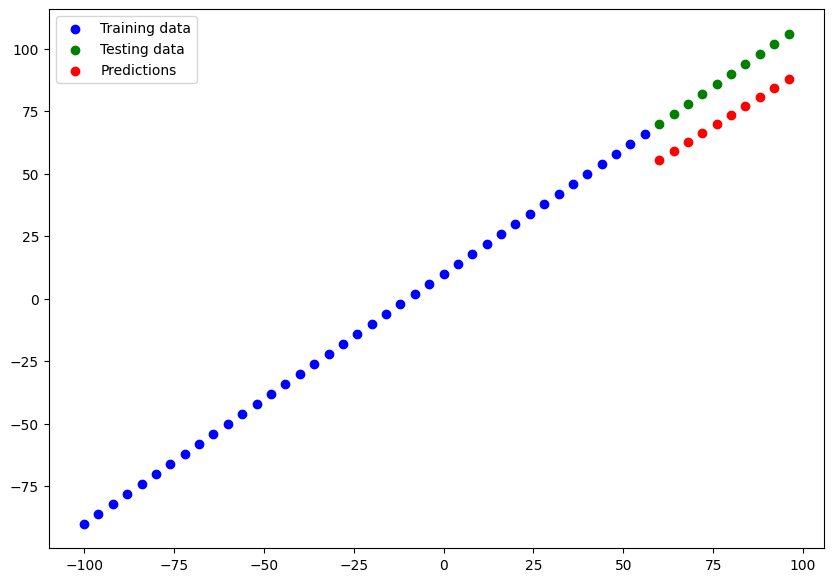

In [45]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [46]:
mae_1 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_1)
mse_1 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=16.160572052001953>,
 <tf.Tensor: shape=(), dtype=float32, numpy=262.3963317871094>)

In [47]:
# Build model_2 (2 dense layers trained for 100 epochs)

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 46.1627 - mae: 46.1627 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.3746 - mae: 13.3746
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.2453 - mae: 21.2453
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.4110 - mae: 10.4110
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7165 - mae: 7.7165
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.6562 - mae: 12.6562
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.5165 - mae: 14.5165
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.5576 - mae: 10.5576
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.4964 - mae: 7.4964
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.0341 - mae: 12.0341
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.2467 - mae: 14.2467
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.6553 - mae: 15.6553
Epoch 13/100
2/2 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


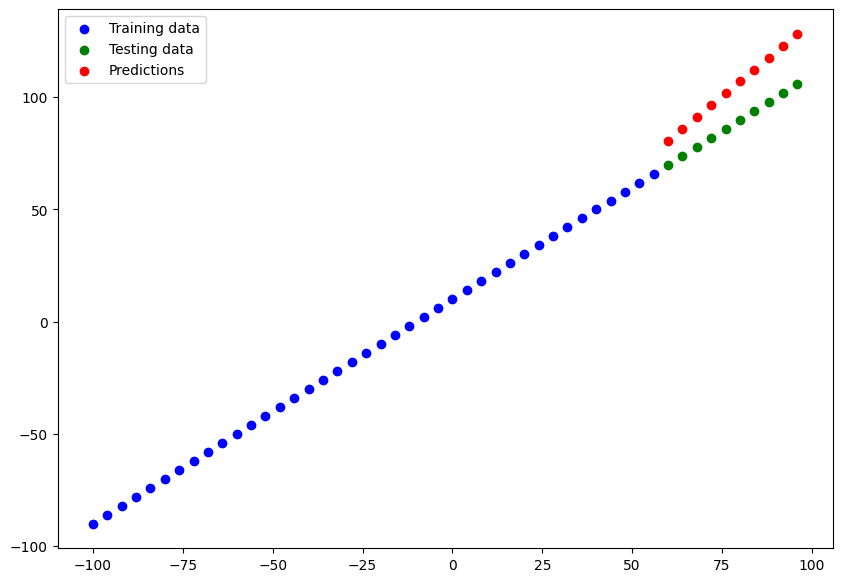

In [48]:
#Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [49]:
mae_2 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_2)
mse_2 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=16.39389419555664>,
 <tf.Tensor: shape=(), dtype=float32, numpy=282.8092956542969>)

In [50]:
#Build model_3  2 layers trainen for 500 epochs
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 30.9823 - mse: 1308.3646 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 26.4911 - mse: 955.5666 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 20.6902 - mse: 579.7419
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 18.1832 - mse: 450.1718
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 17.0370 - mse: 395.9787
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 16.6980 - mse: 377.7486
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.7547 - mse: 219.3960
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.6609 - mse: 300.9894
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.5723 - mse: 328.4106
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.7257 - mse: 213.1480
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.7065 - mse: 299.7591
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.8442 - mse: 189.7200
Epoch 13/5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


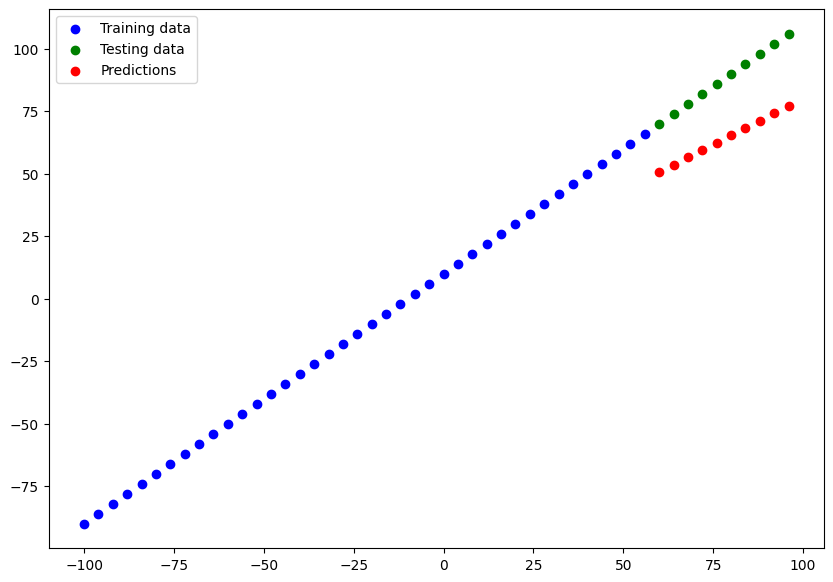

In [51]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [52]:
mae_3 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_3)
mse_3 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=24.118682861328125>,
 <tf.Tensor: shape=(), dtype=float32, numpy=591.072265625>)

In [53]:
import pandas as pd

model_results  = [["model_1",mae_1.numpy(),mse_1.numpy()],
                  ["model_2",mae_2.numpy(),mse_2.numpy()],
                  ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,16.160572,262.396332
1,model_2,16.393894,282.809296
2,model_3,24.118683,591.072266


In [54]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [55]:
#One of our main goals should be to minimize time between experiments.The more experiment you do the more things you'll figure out  which don't work

## Saving our models

1. TheSavedModel format
2. The HDF5 format

In [56]:
model_2.save("best_model.keras")
# yüklemek için:
from tensorflow import keras
model = keras.models.load_model("best_model.keras")

In [57]:
model_2.save("best_model.h5", include_optimizer=True)  # include_optimizer=True ise optimizer durumu da saklanır(ogrenmeye kaldigi yerden devam etme durumu)

In [58]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [59]:
#Compare model_2 predictions with savedmodel format model predictions
model_2_preds = model_2.predict(X_test)
model_preds = model.predict(X_test)
model_2_preds == model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [60]:
loaded = keras.models.load_model("best_model.h5")

In [61]:
#Check to see predictions match or not with model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded.predict(X_test)
model_2_preds ==loaded_h5_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from google colab

1. You can go to the files tab and right click on the file you're after and click "download".
2. Use code

In [62]:
from google.colab import files
files.download("/content/best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
#A LARGER EXAMPLE
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [65]:
insurance["sex"],insurance["smoker"],insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [66]:
#we have to turn into numbers some numerical columns
#pd.get_dummies !!!
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [67]:
#Create x and y values
X = insurance_one_hot.drop("charges",axis=1) #axis=1 sutün
y = insurance_one_hot["charges"]

In [68]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [69]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [70]:
#Create training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [71]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#fit
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10233.5879 - mae: 10233.5879
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7620.1792 - mae: 7620.1792
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7421.8701 - mae: 7421.8701
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7393.9556 - mae: 7393.9556
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7403.8794 - mae: 7403.8794
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7323.1440 - mae: 7323.1440
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7353.2075 - mae: 7353.2075
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7374.2222 - mae: 7374.2222 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7594.1206 - mae: 7594.1206 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7691.9341 - mae: 7691.9341 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7376.8511 - mae: 7376.8511 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [72]:
#Check the results of the insurance model
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8202.5547 - mae: 8202.5547  


[8180.11865234375, 8180.11865234375]

In [73]:
y_train.median(),y_train.mean()

(9575.4421, np.float64(13346.089736364485))

In [75]:
tf.random.set_seed(42)


insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [76]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5060.0581 - mae: 5060.0581  


[4910.546875, 4910.546875]

In [79]:
tf.random.set_seed(42)


insurance_model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [80]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3471.8857 - mae: 3471.8857  


[3406.711669921875, 3406.711669921875]

Text(0.5, 0, 'epochs')

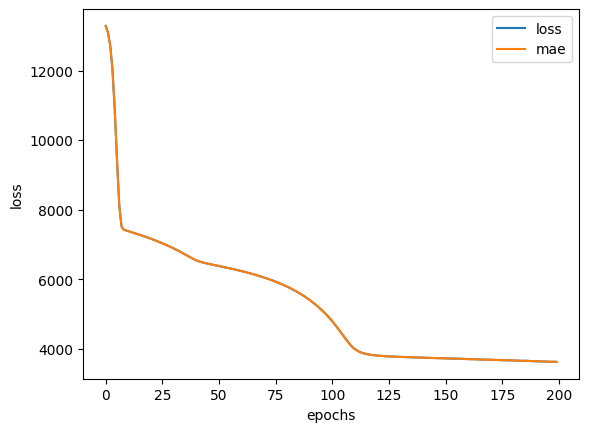

In [82]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#### How long we should train for ?

tensorflow earlystoppingcallback which is tensorflow component you can add to your model to stop training once it stops improving a certain metrics

## Prepreocessing data (Normalization and Standardization)
Normalization (Min–Max) — Özellikleri belirli bir aralığa (genelde 0–1) sıkıştırmaktır. Özellikle mesafeye dayalı algoritmalar ve görselleştirme için uygundur.
Formül: x_norm = (x - min) / (max - min)


Standardization (Z-score) — Veriyi ortalaması 0, standart sapması 1 olacak şekilde dönüştürür. Genelde lineer modeller, PCA ve birçok ML algoritması için tercih edilir.
Formül: x_std = (x - mean) / std


In [83]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

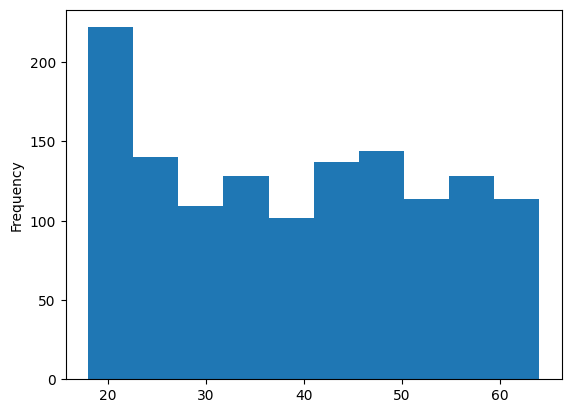

In [85]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

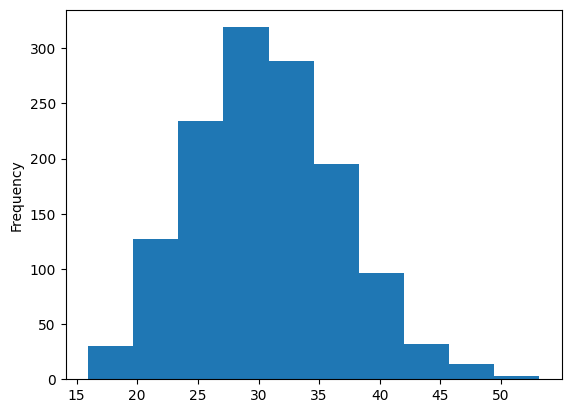

In [86]:
X["bmi"].plot(kind="hist")

In [87]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x and y values (reimported because)
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization(minmaxscaler) and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [92]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [93]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [94]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [95]:
#lets build neural network model and evaluate with the new our x y values
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 13297.5615 - mae: 13297.5615
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13291.8916 - mae: 13291.8916
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13277.6299 - mae: 13277.6299
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13245.2363 - mae: 13245.2363
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13183.5654 - mae: 13183.5654
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13080.9678 - mae: 13080.9678
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12926.3154 - mae: 12926.3154
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12709.1855 - mae: 12709.1855
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12419.5645 - mae: 12419.5645
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12048.2939 - mae: 12048.2939
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11600.5645 - mae: 11600.5645
Epoch 12/200
34/34 ━━━━━━━━━━━

In [96]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3213.9014 - mae: 3213.9014  


[3161.03857421875, 3161.03857421875]

In [97]:
#insurance__model_3 results
#9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3471.8857 - mae: 3471.8857
#[3406.711669921875, 3406.711669921875]